In [93]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import pims
import trackpy as tp

In [94]:
# Diffusion generator for each particle 
def diff_gen(particles, frames, t, imX):
    diff_list = []
    for i in range(0, particles):
        row = 1
        tmp_list = []
        for y in range(0, frames):
            msd = imX.iloc[row-1, i]
            if pd.isnull(msd):
                continue
            else:
                dc = msd/(4*t*row)
                if dc < 0.05 or dc > 5:
                    continue
                tmp_list.append(dc)
                row += 1
        if tmp_list != []:
            diff_list.append(np.average(tmp_list))
    return diff_list

In [95]:
# merge all lists
def list_merger(list1,list2,list3,list4,list5,list6):
    masterlist =[]
    masterlist.append([i for i in list1])
    masterlist.append([i for i in list2])
    masterlist.append([i for i in list3])
    if list4 == None:
        return masterlist
    masterlist.append([i for i in list4])
    masterlist.append([i for i in list5])
    masterlist.append([i for i in list6])
    return masterlist

In [96]:
# hist123 makes histogram from upto 3 lists and plots them in one
def hist123(axes, data1,data2,data3, bins,title,xlabel,ylabel, label1,label2,label3,maxx):
    axes.hist(data1, bins = bins, rwidth = 0.5, alpha = 0.8, facecolor = "Red", edgecolor="Black",
            label = label1, range=[0,maxx])
    if data2 != None:
        axes.hist(data2, bins = 50, rwidth = 0.5, alpha = 0.5, facecolor="Blue", edgecolor="Black",
                label = label2, range = [0,maxx])
    if data3 != None:
        axes.hist(data3, bins = 50,rwidth=0.5, alpha = 0.3, facecolor="Yellow", edgecolor= "Black",
                label = label3, range = [0,maxx])
    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_label(label1)
    axes.legend()

In [97]:
# make list of hydrodynamic radii
def hydro_r(lst):
    rlist = []
    Kb = 1.38*10**-23
    for i in lst:
        r = (Kb*293)/(6*np.pi*1.0016*i*10**-15)*10**6
        rlist.append(r)
    return rlist

In [118]:
# compute standard deviation
def std_dev(lst):
    avg = np.average(lst)
    dev_sum = 0
    for i in lst:
        dev_sum += (avg - i)**2
    return np.sqrt(dev_sum/(len(lst)-1))

In [99]:
im1 = pd.read_pickle("A1")
im2 = pd.read_pickle("A2")
im3 = pd.read_pickle("A3")

im4 = pd.read_pickle("B1")
im5 = pd.read_pickle("B2")
im6 = pd.read_pickle("B3")

In [100]:
list1 = diff_gen(75, 100, 1/5, im1)
list2 = diff_gen(80, 100, 1/5, im2)
list3 = diff_gen(90, 100, 1/5, im3)

list4 = diff_gen(584, 100, 1/5, im4)
list5 = diff_gen(674, 100, 1/5, im5)
list6 = diff_gen(648, 100, 1/5, im6)

In [101]:
rlist1 = hydro_r(list1)
rlist2 = hydro_r(list2)
rlist3 = hydro_r(list3)

rlist4 = hydro_r(list4)
rlist5 = hydro_r(list5)
rlist6 = hydro_r(list6)

In [102]:
diff_lstA = list_merger(list1, list2, list3, list4 = None, list5 = None, list6 = None)
diff_lstB = list_merger(list4, list5, list6, list4 = None, list5 = None, list6 = None)
diff_lst_total = list_merger(list1, list2, list3, list4, list5, list6)

In [103]:
rlistA = list_merger(list1, list2, list3, list4 = None, list5 = None, list6 = None)
rlistB = list_merger(list4, list5, list6, list4 = None, list5 = None, list6 = None)
rlist_total = list_merger(list1, list2, list3, list4, list5, list6)

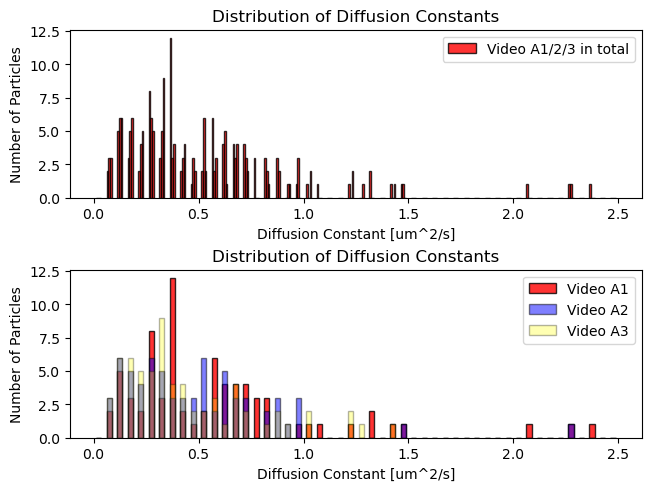

In [104]:
# plot diff. constants for A
fig, ax = plt.subplots(2,1, constrained_layout = True)
hist123(ax[1], list1, list2, list3, 50, "Distribution of Diffusion Constants", "Diffusion Constant [um^2/s]", "Number of Particles", "Video A1", "Video A2", "Video A3", maxx = 2.5)
hist123(ax[0], data1 = diff_lstA, data2 = None, data3 = None, bins = 50, title = "Distribution of Diffusion Constants", xlabel = "Diffusion Constant [um^2/s]", ylabel = "Number of Particles", 
        label1 = "Video A1/2/3 in total", label2  = None, label3 = None, maxx = 2.5)
plt.show()

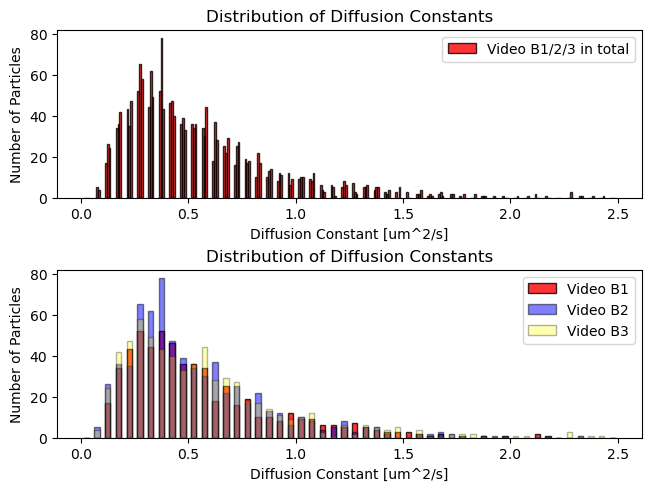

In [105]:
# plot diff. constants for B
fig, ax = plt.subplots(2,1, constrained_layout = True)
hist123(ax[1], list4, list5, list6, 50, "Distribution of Diffusion Constants", "Diffusion Constant [um^2/s]", "Number of Particles", "Video B1", "Video B2", "Video B3", maxx = 2.5)
hist123(ax[0], data1 = diff_lstB, data2 = None, data3 = None, bins = 50, title = "Distribution of Diffusion Constants", xlabel = "Diffusion Constant [um^2/s]", ylabel = "Number of Particles", 
        label1 = "Video B1/2/3 in total", label2  = None, label3 = None, maxx = 2.5)
plt.show()

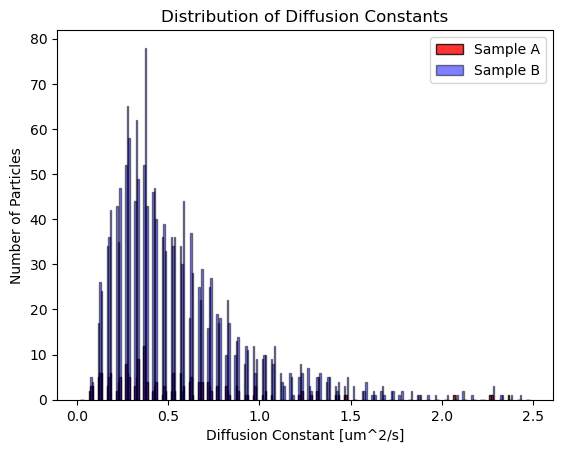

In [107]:
fig, ax = plt.subplots()
hist123(ax, data1 = diff_lstA, data2 = diff_lstB, data3 = None, bins = 50, title = "Distribution of Diffusion Constants", xlabel = "Diffusion Constant [um^2/s]", ylabel = "Number of Particles", 
        label1 = "Sample A", label2  = "Sample B", label3 = None, maxx = 2.5)
plt.show()

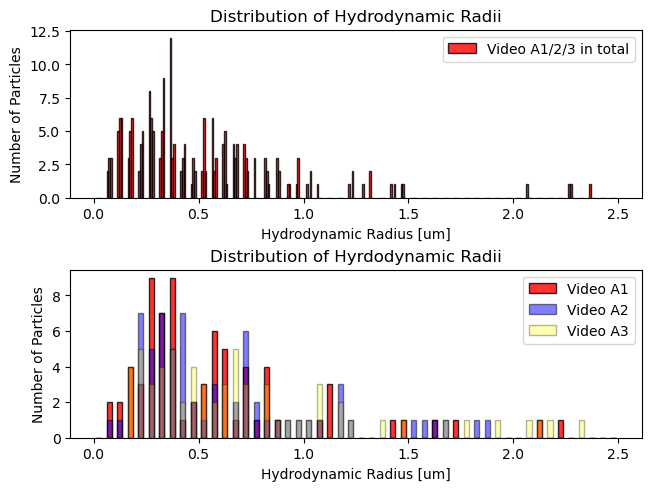

In [109]:
# plot hydro. radii for sample A
fig, ax = plt.subplots(2,1, constrained_layout = True)
hist123(ax[1], rlist1, rlist2, rlist3, 50, "Distribution of Hyrdodynamic Radii", "Hydrodynamic Radius [um]",    "Number of Particles", "Video A1", "Video A2", "Video A3", maxx = 2.5)
hist123(ax[0], data1 = rlistA, data2 = None, data3 = None, bins=50, title="Distribution of Hydrodynamic Radii", xlabel = "Hydrodynamic Radius [um]", ylabel = "Number of Particles", label1 = "Video A1/2/3 in total",
        label2 = None, label3 = None, maxx = 2.5)
plt.show()

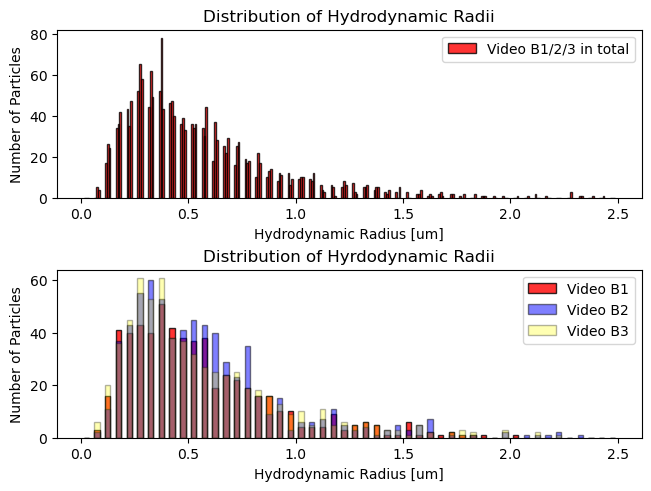

In [110]:
fig, ax = plt.subplots(2,1, constrained_layout = True)
hist123(ax[1], rlist4, rlist5, rlist6, 50, "Distribution of Hyrdodynamic Radii", "Hydrodynamic Radius [um]",    "Number of Particles", "Video B1", "Video B2", "Video B3", maxx = 2.5)
hist123(ax[0], data1 = rlistB, data2 = None, data3 = None, bins=50, title="Distribution of Hydrodynamic Radii", xlabel = "Hydrodynamic Radius [um]", ylabel = "Number of Particles", label1 = "Video B1/2/3 in total",
        label2 = None, label3 = None, maxx = 2.5)
plt.show()

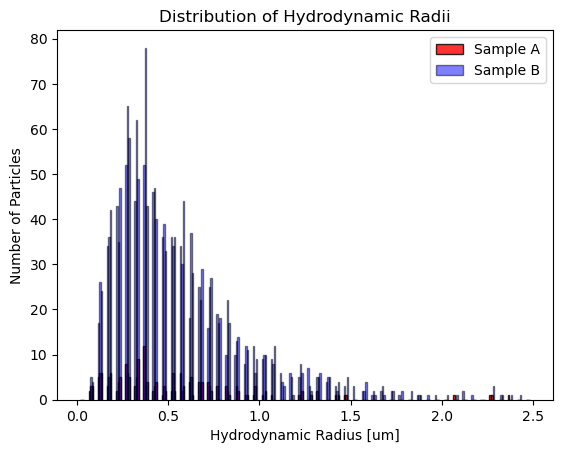

In [111]:
# Hydro. Radii for A and B
fig, ax = plt.subplots()
hist123(ax, data1 = rlistA, data2 = rlistB, data3 = None, bins=50, title="Distribution of Hydrodynamic Radii", xlabel = "Hydrodynamic Radius [um]", ylabel = "Number of Particles", label1 = "Sample A",
        label2 = "Sample B", label3 = None, maxx = 2.5)
plt.show()

In [149]:
# output some data
# just changed the lists here from 1 to 6 to get diff constants
print(np.average(list6))
print(std_dev(list6))

0.5664638660570437
0.39159805450694113


In [151]:
# total diff. for lists
print(np.average(np.sum(diff_lstB)))
print(np.std(np.sum(diff_lstB)))

0.550934805065533
0.3633180358844588


In [160]:
print(np.average(rlist6))
print(np.std(rlist6))

0.576849095585584
0.40794245325463363


In [162]:
print(np.average(np.sum(rlistB)))
print(np.std(np.sum(rlistB)))

0.550934805065533
0.3633180358844588
